**<h1 align="center">Risk Game</h1>**

# <h1 align="center">Assignment 5</h1>

## <h1 align="center">By Sharon Curley</h1>

***

### About the Assignment
***
The assignment is to write a program (or notebook) which simulates 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.
Here are the main sections of the assignment.

1. Import Libraries
2. Rules of Risk
3. The Game
4. Plot the Results
5. References

### 1. Import the Libraries
***

I import the following libraries to plot the dataset.

- `matplotlib.pyplot`: Essential for creating static, animated, and interactive visualizations in Python. It is closely integrated with NumPy and provides a MATLAB-like interface for creating plots and visualizations.
- `numpy`: It contains functionality for multidimensional arrays, high-level mathematical functions such as linear algebra operations.
- `pandas`: Fundamental data analysis and manipulation library built on top of the Python programming language. It offers data structures and operations for manipulating numerical tables and time series.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 2. Rules of Risk
***

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

- The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
  - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
- The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
  - If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)


### 3. The Game
***

In [3]:
def simulate_battle_round():

    attacker_rolls = sorted(np.random.randint(1, 7, 3), reverse=True)       # toll dice 1-6, 3 times - rolls are sorted in descending order (reverse=True). Need highest first.
    defender_rolls = sorted(np.random.randint(1, 7, 2), reverse=True)       # toll dice 1-6, 2 times - rolls are sorted in descending order
    
    attacker_losses = 0                                                     # variables that count the losses from 0
    defender_losses = 0
    
    if attacker_rolls[0] <= defender_rolls[0]:                              # If the attacker’s first roll is less than or equal to the defender's
        attacker_losses += 1                                                # the attacker loses a troop
    else:
        defender_losses += 1                                                # otherwise the defender loses
    
    if attacker_rolls[1] <= defender_rolls[1]:                              # second roll and comparison
        attacker_losses += 1
    else:
        defender_losses += 1
    
    return attacker_losses, defender_losses, attacker_rolls, defender_rolls 

num_rounds = 1000                                                            
attacker_losses = []                                                        # creates empty lists [] to store results to use below
defender_losses = []
all_attacker_rolls = []
all_defender_rolls = []

for _ in range(num_rounds):
    a_loss, d_loss, a_rolls, d_rolls = simulate_battle_round()              # results are stored in variables
    attacker_losses.append(a_loss)                                          # Each result is appended to the appropriate list, storing the losses and rolls from each round.
    defender_losses.append(d_loss)
    all_attacker_rolls.append(a_rolls)
    all_defender_rolls.append(d_rolls)
    
rounds_to_print = min(10, len(all_attacker_rolls))                          # Print up to 10 rounds, or less to check the results
print(f"\nFirst {rounds_to_print} rounds' dice rolls and losses:")
for i in range(rounds_to_print):                                            # gets the results of each specific round using the index i.                                 
    print(f"Round {i+1}:")                                                  # i taking values 1 through 10.
    print(f"  Attacker Rolls: {all_attacker_rolls[i]}, Defender Rolls: {all_defender_rolls[i]}")  # pulls data from all_attacker_rolls and all_defender_rolls.
    print(f"  Attacker Losses: {attacker_losses[i]}, Defender Losses: {defender_losses[i]}")      # as above for attacker_losses and defender_losse
    print()                                                                 # blank line for space btween next round


First 10 rounds' dice rolls and losses:
Round 1:
  Attacker Rolls: [6, 2, 1], Defender Rolls: [6, 5]
  Attacker Losses: 2, Defender Losses: 0

Round 2:
  Attacker Rolls: [5, 2, 1], Defender Rolls: [5, 3]
  Attacker Losses: 2, Defender Losses: 0

Round 3:
  Attacker Rolls: [6, 4, 3], Defender Rolls: [3, 2]
  Attacker Losses: 0, Defender Losses: 2

Round 4:
  Attacker Rolls: [4, 3, 2], Defender Rolls: [4, 1]
  Attacker Losses: 1, Defender Losses: 1

Round 5:
  Attacker Rolls: [4, 3, 1], Defender Rolls: [5, 3]
  Attacker Losses: 2, Defender Losses: 0

Round 6:
  Attacker Rolls: [5, 3, 2], Defender Rolls: [5, 1]
  Attacker Losses: 1, Defender Losses: 1

Round 7:
  Attacker Rolls: [4, 2, 1], Defender Rolls: [5, 4]
  Attacker Losses: 2, Defender Losses: 0

Round 8:
  Attacker Rolls: [4, 1, 1], Defender Rolls: [6, 4]
  Attacker Losses: 2, Defender Losses: 0

Round 9:
  Attacker Rolls: [6, 1, 1], Defender Rolls: [6, 4]
  Attacker Losses: 2, Defender Losses: 0

Round 10:
  Attacker Rolls: [2, 

### 4. Plot the Results
***

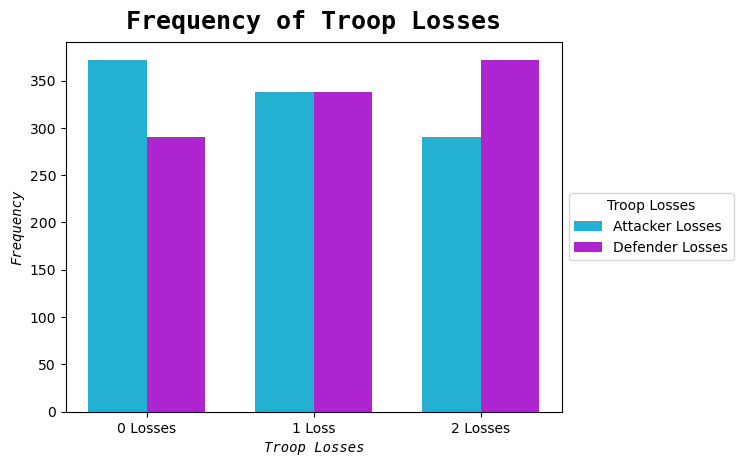

In [4]:
attacker_loss_counts = [attacker_losses.count(i) for i in range(3)]         # counts the losses 0, 1, 2 into a list
defender_loss_counts = [defender_losses.count(i) for i in range(3)]

labels = ['0 Losses', '1 Loss', '2 Losses']                                 # x-axis
x = np.arange(len(labels))                                                  # array for the position for 0,1,2
width = 0.35                                                                # bar size

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, attacker_loss_counts, width, label='Attacker Losses', color='#24b1d1')
bars2 = ax.bar(x + width/2, defender_loss_counts, width, label='Defender Losses', color='#ae24d1')

total_attacker_losses = sum(attacker_losses)
total_defender_losses = sum(defender_losses)

#print("Total Attacker Losses:", total_attacker_losses)
#print("Total Defender Losses:", total_defender_losses)

ax.set_xlabel('Troop Losses',fontsize=10,style="italic",family="monospace")
ax.set_ylabel('Frequency',fontsize=10,style="italic",family="monospace")
ax.set_title('Frequency of Troop Losses',fontsize=18,loc="center",horizontalalignment="center",verticalalignment="bottom",fontweight="bold",family="monospace")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title="Troop Losses",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

### 5. References
***

1. Topic 5 Lecture Notebooks - Numpy and Random

2. Code Review-Stack Exchange - code without random - https://codereview.stackexchange.com/questions/249260/python-risk-game

3. numpy.random.randint - https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html 

4. Python, numpy sort array - Reverse = True - https://stackoverflow.com/questions/14875248/python-numpy-sort-array
   
5. w3schools - NumPy Sorting Arrays - https://www.w3schools.com/python/numpy/numpy_array_sort.asp

6. Efficiently sorting a numpy array in descending order - https://stackoverflow.com/questions/26984414/efficiently-sorting-a-numpy-array-in-descending-order - 
   Note to myself: attacker[::-1].sort() sorts the array in place, whereas a=np.sort(attacker)[::-1] creates a new array.    

7. The Python Coding Book - Using Python’s NumPy To Improve Your Board Game Strategy: Your Odds When Attacking in ‘Risk’ - https://thepythoncodingbook.com/2022/12/30/using-python-numpy-to-improve-board-game-strategy-risk/

8.  numpy.append - https://numpy.org/doc/stable/reference/generated/numpy.append.html

9.  np.append() - How To Use NumPy Append in Python - https://www.nickmccullum.com/numpy-np-append/

10. Python's min() and max(): Find Smallest and Largest Values -  https://realpython.com/python-min-and-max/

11. Grouped bar chart with labels - https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

12. Bar Plots in Matplotlib - https://python-fiddle.com/tutorials/matplotlib-bar-plot   x - width/2

13. matplotlib.axes.Axes.set_xticks - https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html

